**[The full project in github](https://github.com/Chaimaaorg/Platform-for-Real-Estate-Price-Forcasting)**

https://github.com/Chaimaaorg/Platform-for-Real-Estate-Price-Forcasting

In [1]:
import pandas as pd
import numpy as np

#Ploating
import matplotlib.pyplot as plt
import seaborn as sns

#Emcoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

# x-y split
from sklearn.model_selection import train_test_split

#Scaling
from sklearn.preprocessing import StandardScaler

# Regression algorithms
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor  # Multi-layer perceptron regressor (MLP)

#MSE AND MAE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

#
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

# Data Loading 

In [2]:
df = pd.read_csv("/kaggle/input/paris-housing-price-prediction/ParisHousing.csv")
df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [4]:
df.shape

(10000, 17)

In [5]:
df.columns

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price'],
      dtype='object')

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
squareMeters,10000.0,4.987013e+04,2.877438e+04,89.0,25098.50,50105.5,74609.75,99999.0
numberOfRooms,10000.0,5.035840e+01,2.881670e+01,1.0,25.00,50.0,75.00,100.0
hasYard,10000.0,5.087000e-01,4.999493e-01,0.0,0.00,1.0,1.00,1.0
hasPool,10000.0,4.968000e-01,5.000148e-01,0.0,0.00,0.0,1.00,1.0
floors,10000.0,5.027630e+01,2.888917e+01,1.0,25.00,50.0,76.00,100.0
cityCode,10000.0,5.022549e+04,2.900668e+04,3.0,24693.75,50693.0,75683.25,99953.0
cityPartRange,10000.0,5.510100e+00,2.872024e+00,1.0,3.00,5.0,8.00,10.0
numPrevOwners,10000.0,5.521700e+00,2.856667e+00,1.0,3.00,5.0,8.00,10.0
made,10000.0,2.005488e+03,9.308090e+00,1990.0,1997.00,2005.5,2014.00,2021.0
isNewBuilt,10000.0,4.991000e-01,5.000242e-01,0.0,0.00,0.0,1.00,1.0


# Data Cleaning

**Handle NAN Values**

In [7]:
df.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

In [8]:
df.shape

(10000, 17)

**View Duplicate Rows**

In [9]:
duplicates = df[df.duplicated()]
print(f"Duplicate rows: \n{duplicates}")

Duplicate rows: 
Empty DataFrame
Columns: [squareMeters, numberOfRooms, hasYard, hasPool, floors, cityCode, cityPartRange, numPrevOwners, made, isNewBuilt, hasStormProtector, basement, attic, garage, hasStorageRoom, hasGuestRoom, price]
Index: []


**Data Exploring**

In [10]:
df['isNewBuilt'].unique()

array([0, 1])

In [11]:
df['made'].unique()

array([2005, 2015, 2021, 2012, 1990, 1995, 2003, 1993, 2011, 2008, 2004,
       2018, 2009, 2013, 2016, 2017, 2000, 2019, 2020, 1994, 2014, 1998,
       2001, 1996, 1991, 1992, 1999, 1997, 2010, 2007, 2006, 2002])

In [12]:
df=df.drop('isNewBuilt',axis=1)

In [13]:
df['HouseAge']=2025-df['made']
df=df.drop('made',axis=1)

In [14]:
df.shape

(10000, 16)

In [15]:
df

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,HouseAge
0,75523,3,0,1,63,9373,3,8,1,4313,9005,956,0,7,7559081.5,20
1,80771,39,1,1,98,39381,8,6,0,3653,2436,128,1,2,8085989.5,10
2,55712,58,0,1,19,34457,6,8,0,2937,8852,135,1,9,5574642.1,4
3,32316,47,0,0,6,27939,10,4,1,659,7141,359,0,3,3232561.2,13
4,70429,19,1,1,90,38045,3,7,0,8435,2429,292,1,4,7055052.0,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,73133,7,6,1,9311,1698,218,0,4,176425.9,16
9996,44403,29,1,1,12,34606,9,4,1,9061,1742,230,0,0,4448474.0,35
9997,83841,3,0,0,69,80933,10,10,1,8304,7730,345,1,9,8390030.5,20
9998,59036,70,0,0,96,55856,1,3,1,2590,6174,339,1,4,5905107.0,15


# Data Visualization

**Histogram for entire dataset**

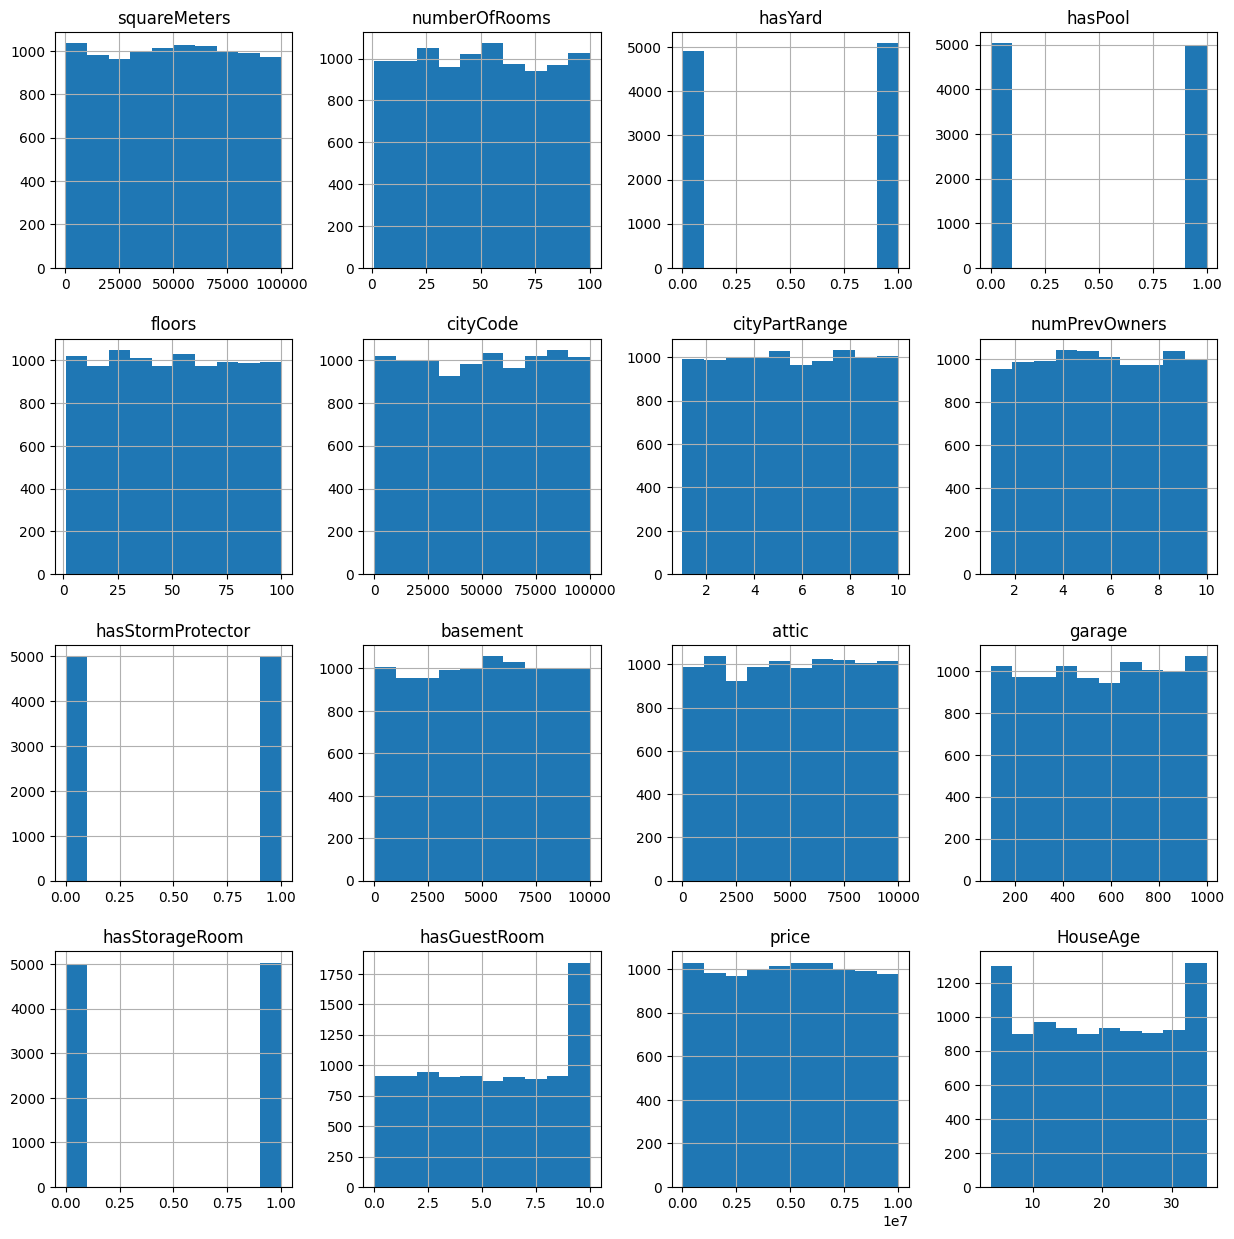

In [16]:
df.hist(figsize=(15,15))
plt.show()

**Distribution of price**

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


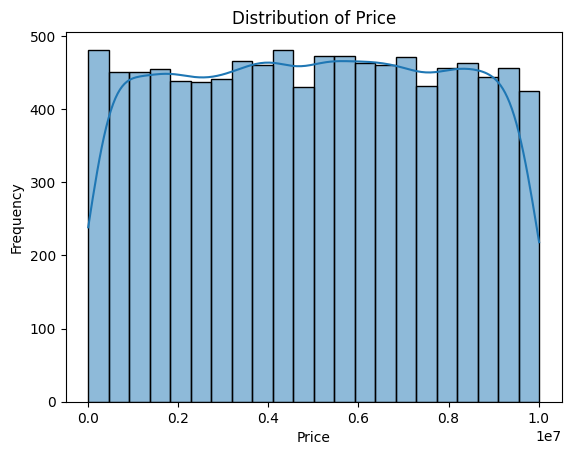

In [17]:
import seaborn as sns
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [18]:
def check_balance_features(column: str,description :str):
    plt.pie(df[column].value_counts(), colors=['red', 'green'], labels=["Don't have", 'Have'], autopct='%1.1f%%')
    plt.title(description)
    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.show()

def check_balance_features_with_numbers(column : str,description):
    plt.bar(df[column].value_counts().index,df[column].value_counts().values,color=['red','green'])
    plt.title(description)
    plt.ylabel('Number of House')
    
    handles = [plt.Rectangle((0,0),1,1, color=c,ec="k") for c in ['red', 'green']]
    labels= ["Don't have",'Have']
    plt.legend(handles, labels)
    
    plt.show()

**Number of House that has Yard, Pool and Storm Protector**

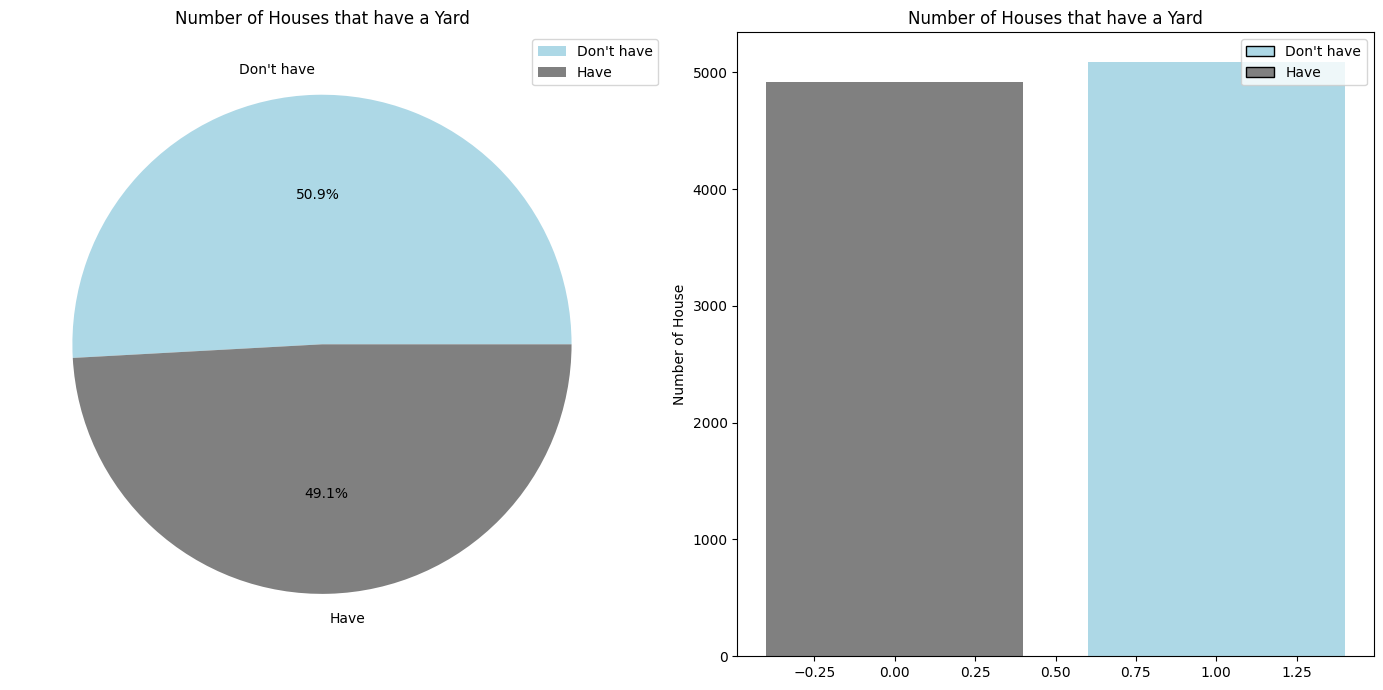

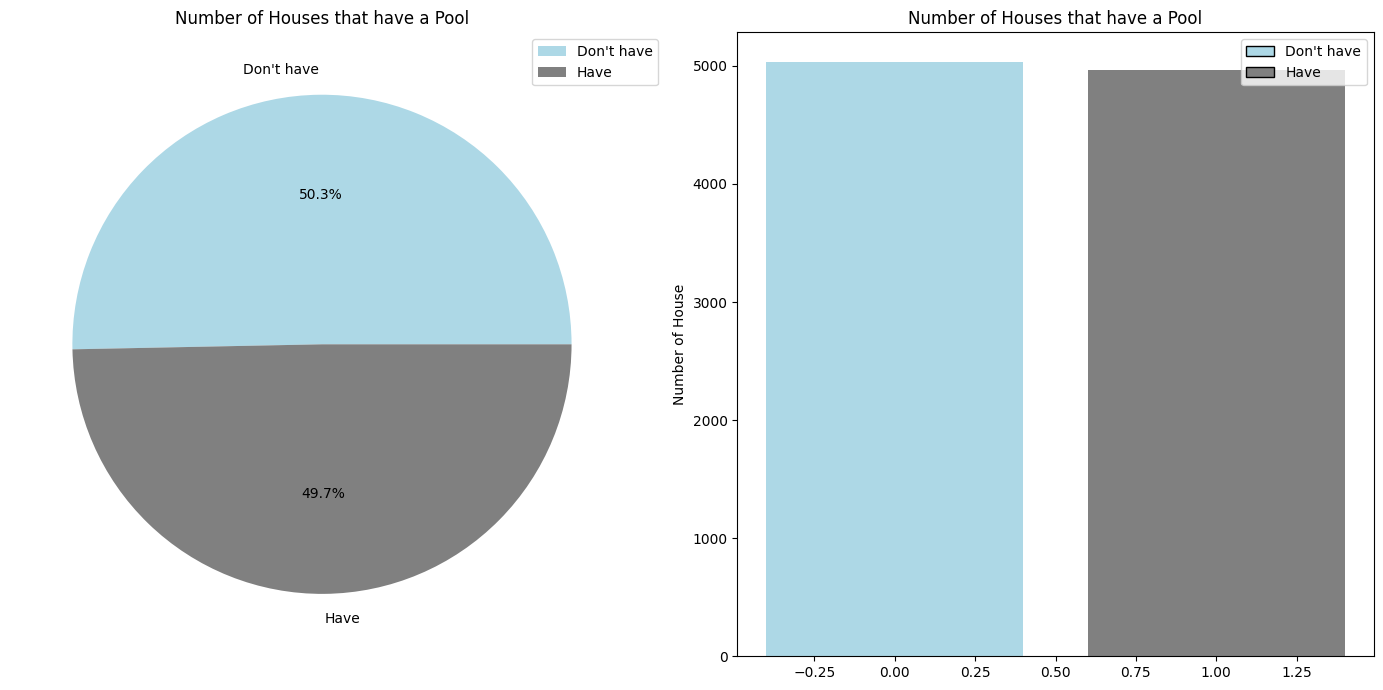

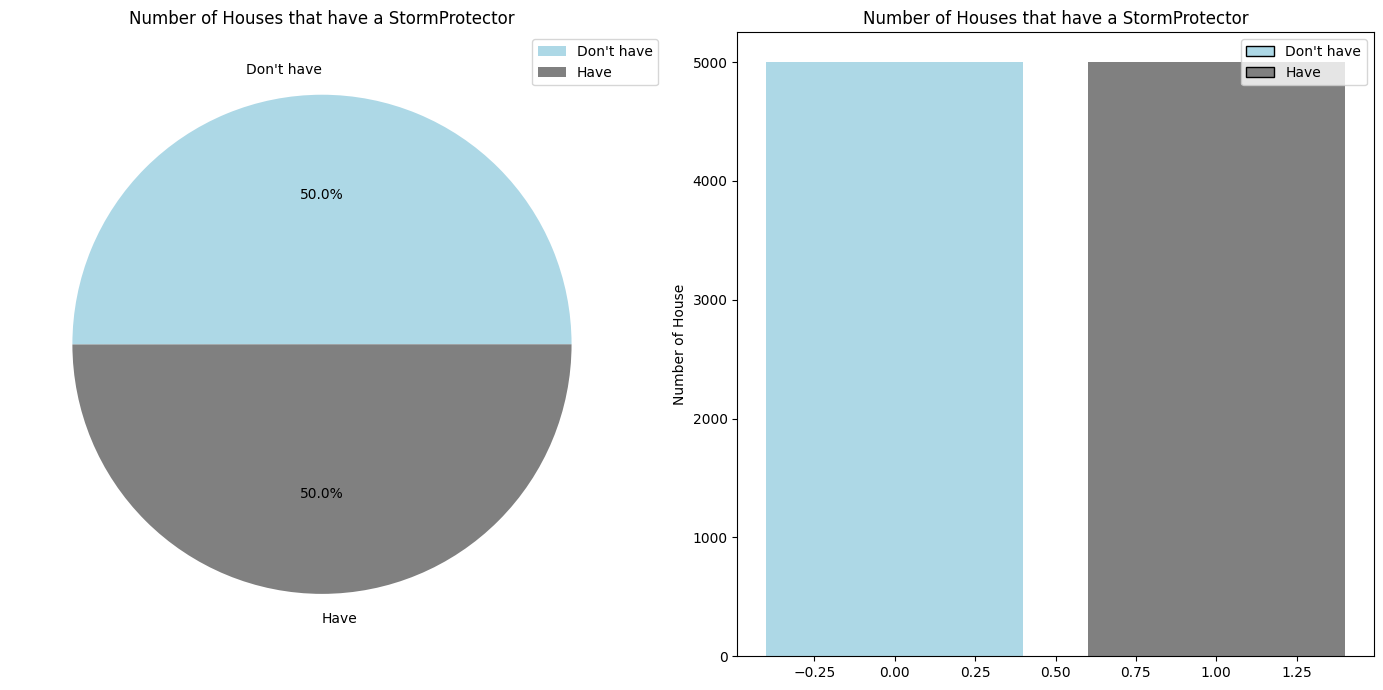

In [19]:
import matplotlib.pyplot as plt

def check_balance_features(column: str, description: str):
    plt.pie(df[column].value_counts(), colors=['lightblue','grey'], labels=["Don't have", 'Have'], autopct='%1.1f%%')
    plt.title(description)
    plt.legend(bbox_to_anchor=(1.05, 1))

def check_balance_features_with_numbers(column: str, description: str):
    plt.bar(df[column].value_counts().index, df[column].value_counts().values, color=['lightblue','grey'])
    plt.title(description)
    plt.ylabel('Number of House')

    handles = [plt.Rectangle((0, 0), 1, 1, color=c, ec="k") for c in ['lightblue','grey']]
    labels = ["Don't have", 'Have']
    plt.legend(handles, labels)

def plot_balance_features(df, column,description):
    fig, axs = plt.subplots(1, 2, figsize=(14, 7)) 
    
    plt.sca(axs[0])  
    check_balance_features(column, description)
    
    plt.sca(axs[1]) 
    check_balance_features_with_numbers(column, description)
    
    # Afficher les graphiques
    plt.tight_layout()
    plt.show()

checklist = ["hasYard","hasPool","hasStormProtector"]
for column in checklist:
    plot_balance_features(df, column, f"Number of Houses that have a {column[3:]}")

**House Age**

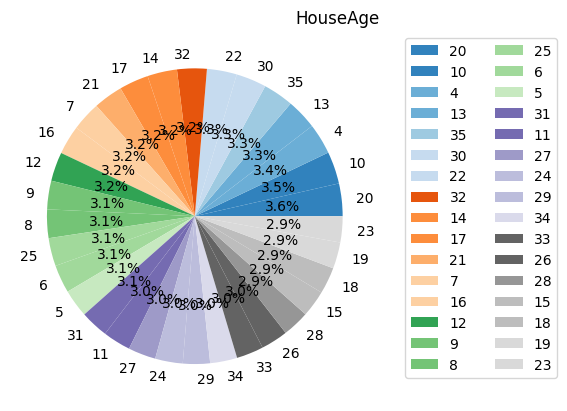

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

# Get unique values and their corresponding counts
unique_house_age = df['HouseAge'].unique()
num_unique = len(unique_house_age)

# Generate a list of unique colors
colors = plt.cm.tab20c(np.linspace(0, 1, num_unique))  # You can use any colormap like tab20c

# Plot the pie chart with unique colors for each HouseAge
plt.pie(df['HouseAge'].value_counts(), labels=unique_house_age, autopct='%1.1f%%', colors=colors)
plt.title('HouseAge', loc='right')
plt.legend(bbox_to_anchor=(1.05, 1), ncols=2)
plt.show()

**Visualise the distribution of House Ages and the Number of Rooms , Floors, City Part Range, Previous Owners, Guest Rooms**

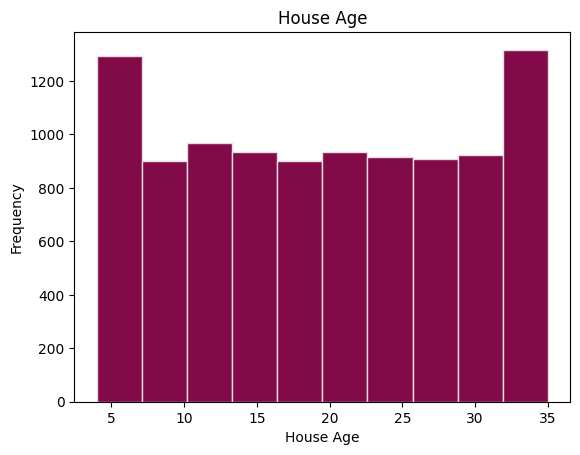

Skew of HouseAge: 0.005157023057576111


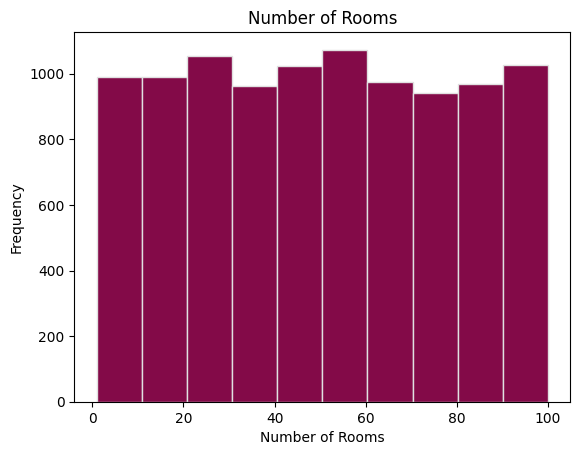

Skew of numberOfRooms: 0.018737341729742202


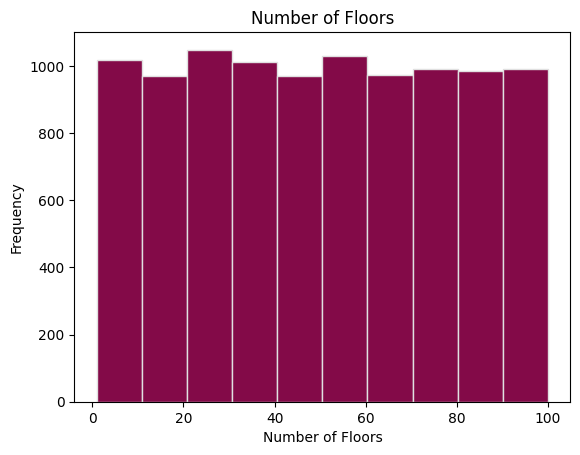

Skew of floors: 0.014930628435050107


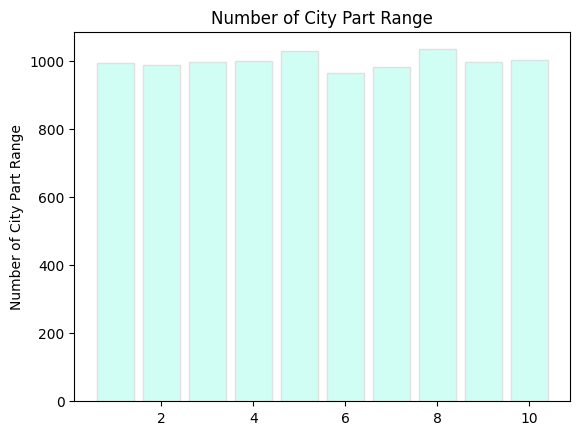

Skew of cityPartRange: -0.00333917910341556


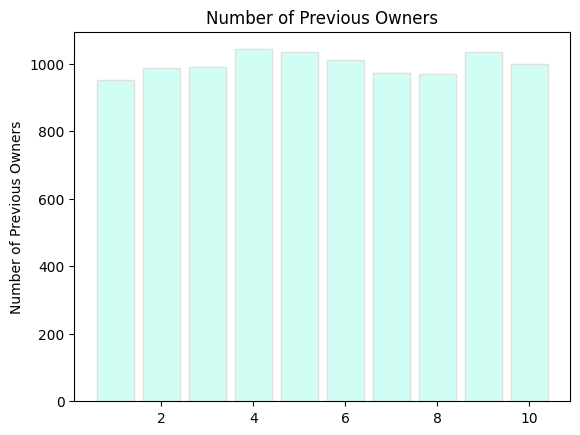

Skew of numPrevOwners: 0.0022448613864532985


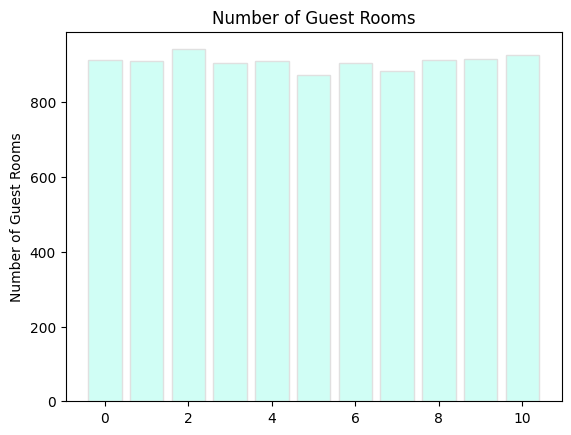

Skew of hasGuestRoom: 0.007966378133967179


In [21]:
import matplotlib.pyplot as plt

def plot_histogram(column, bins=10, color='#830A48', edgecolor='#e0e0e0', title='', xlabel='', ylabel='Frequency'):
    plt.hist(df[column], bins=bins, facecolor=color, edgecolor=edgecolor)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    print(f"Skew of {column}: {df[column].skew()}")

def plot_bar(column, color='#D0FEF5', edgecolor='#e0e0e0', title='', ylabel='Count'):
    plt.bar(df[column].value_counts().index, df[column].value_counts().values, color=color, edgecolor=edgecolor)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.show()
    print(f"Skew of {column}: {df[column].skew()}")

# Plotting histograms
plot_histogram('HouseAge', title='House Age', xlabel='House Age')
plot_histogram('numberOfRooms', title='Number of Rooms', xlabel='Number of Rooms')
plot_histogram('floors', title='Number of Floors', xlabel='Number of Floors')

# Plotting bar charts
plot_bar('cityPartRange', title='Number of City Part Range', ylabel='Number of City Part Range')
plot_bar('numPrevOwners', title='Number of Previous Owners', ylabel='Number of Previous Owners')
plot_bar('hasGuestRoom', title='Number of Guest Rooms', ylabel='Number of Guest Rooms')

# Relation between **squareMeters** & **price**

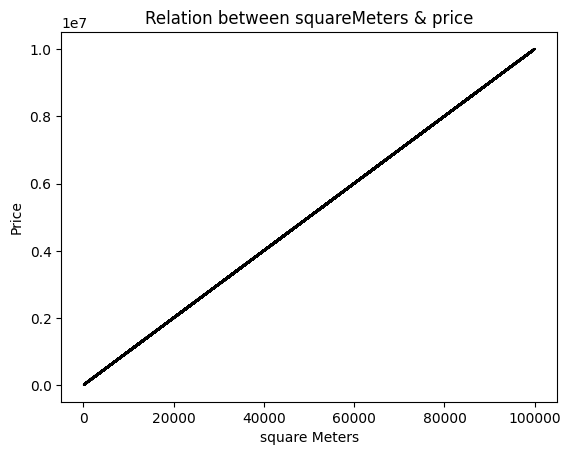

In [22]:
plt.plot(df['squareMeters'],df['price'],color='k')
plt.xlabel('square Meters')
plt.ylabel('Price')
plt.title('Relation between squareMeters & price')
plt.show()

Relationships between various house characteristics, such as the **number of rooms**, **number of floors**, **geographical area** (**cityPartRange**), **number of previous owners** (**numPrevOwners**), **basement** presence (**basement**), **attic** (**attic**), **guest room** presence (**hasGuestRoom**), and **house age** (**HouseAge**), and their influence on **price**.

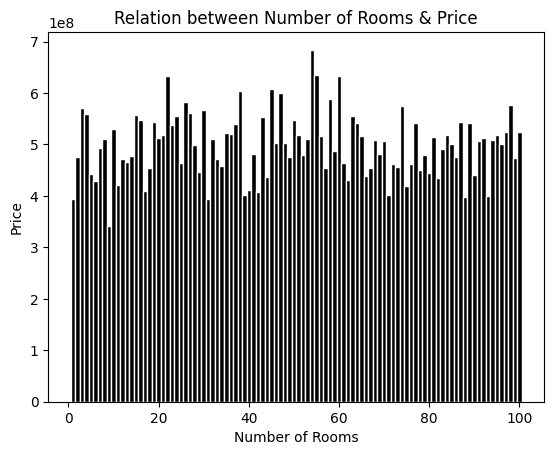

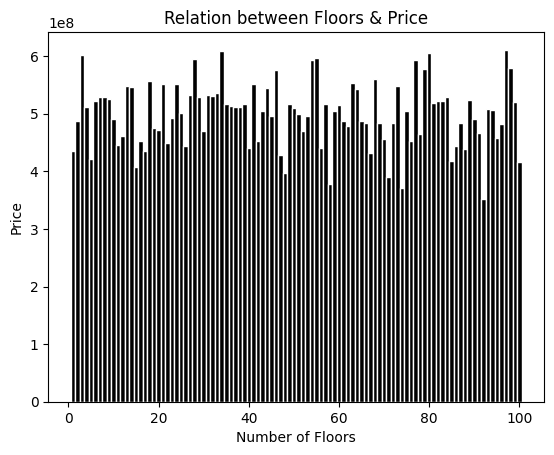

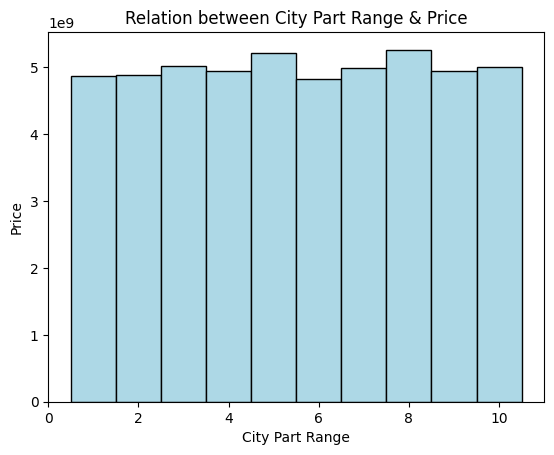

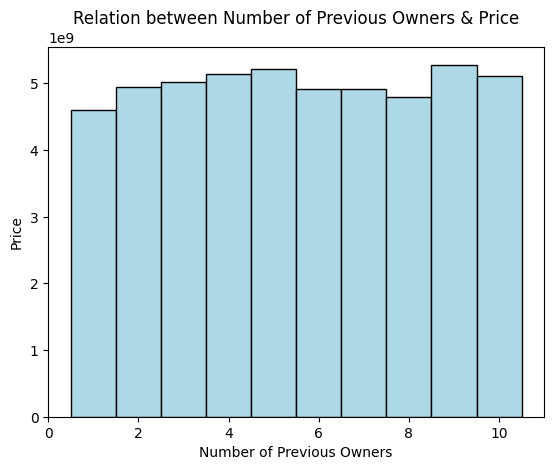

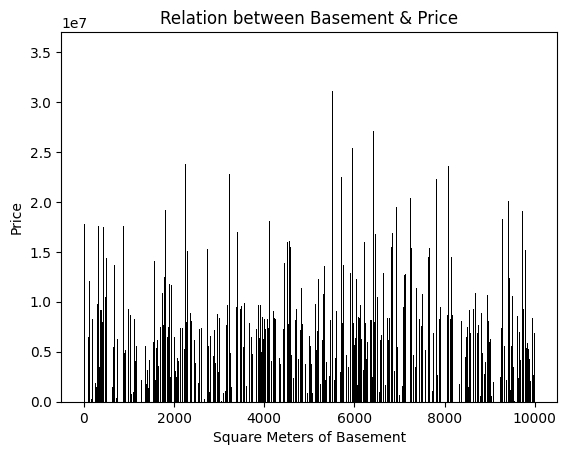

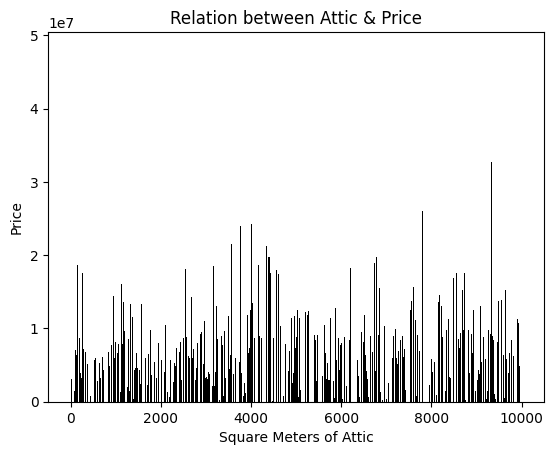

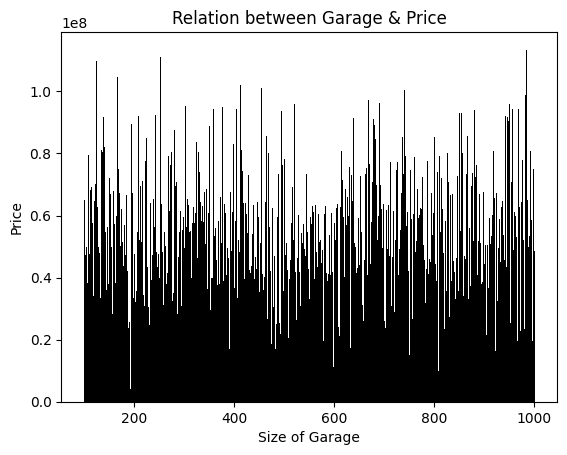

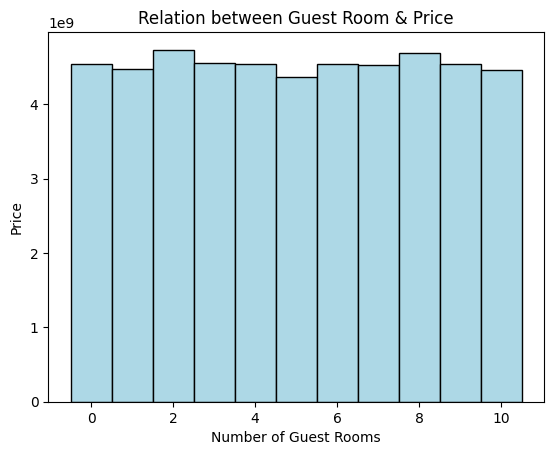

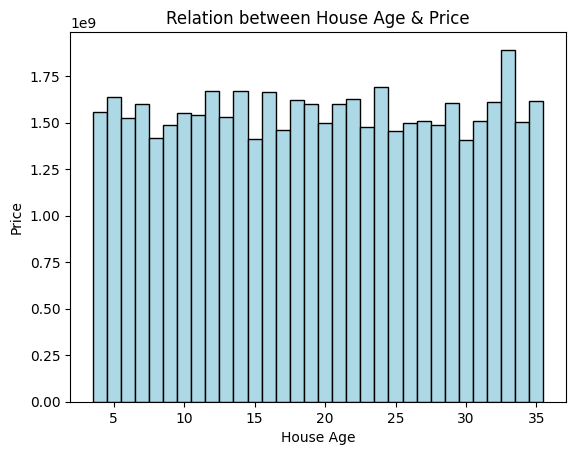

In [23]:
import matplotlib.pyplot as plt

def plot_relation(df, group_by_column, color='k', edge_color=None, xlabel='', ylabel='Price', title=''):
    """
    Plot the relation between a grouped column and price.
    :param df: DataFrame to plot from.
    :param group_by_column: Column to group by.
    :param color: Bar color.
    :param edge_color: Bar edge color (optional).
    :param xlabel: X-axis label.
    :param ylabel: Y-axis label.
    :param title: Graph title.
    """
    cbys = df.groupby(group_by_column)['price'].sum()
    
    # If edge_color is not specified, omit the edgecolor
    if edge_color:
        plt.bar(cbys.index, cbys.values, width=1, color=color, edgecolor=edge_color)
    else:
        plt.bar(cbys.index, cbys.values, width=1, color=color)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

# Example usage:
plot_relation(df, 'numberOfRooms', 'k', 'w', 'Number of Rooms', 'Price', 'Relation between Number of Rooms & Price')
plot_relation(df, 'floors', 'k', 'w', 'Number of Floors', 'Price', 'Relation between Floors & Price')
plot_relation(df, 'cityPartRange', 'lightblue', 'k', 'City Part Range', 'Price', 'Relation between City Part Range & Price')
plot_relation(df, 'numPrevOwners', 'lightblue', 'k', 'Number of Previous Owners', 'Price', 'Relation between Number of Previous Owners & Price')
plot_relation(df, 'basement', 'k', None, 'Square Meters of Basement', 'Price', 'Relation between Basement & Price')
plot_relation(df, 'attic', 'k', None, 'Square Meters of Attic', 'Price', 'Relation between Attic & Price')
plot_relation(df, 'garage', 'k', None, 'Size of Garage', 'Price', 'Relation between Garage & Price')
plot_relation(df, 'hasGuestRoom', 'lightblue', 'k', 'Number of Guest Rooms', 'Price', 'Relation between Guest Room & Price')
plot_relation(df, 'HouseAge', 'lightblue', 'k', 'House Age', 'Price', 'Relation between House Age & Price')

# BoxPloat

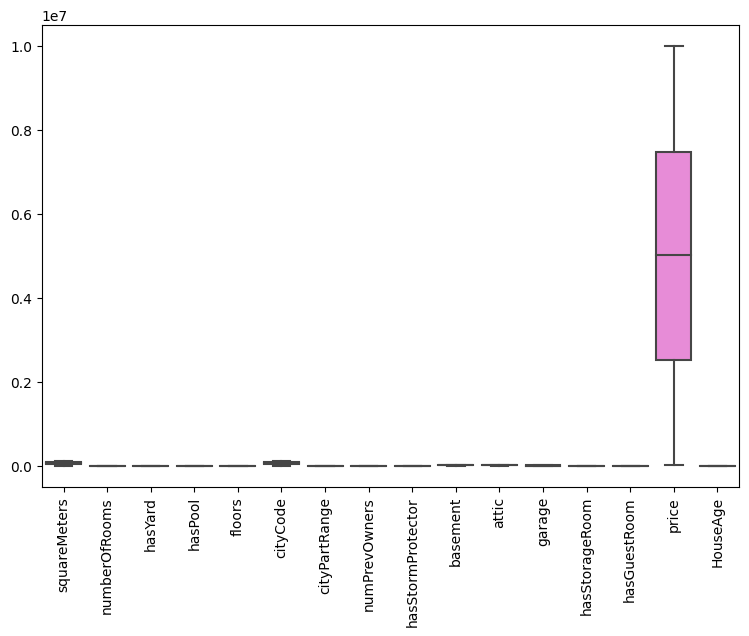

In [24]:
plt.figure(figsize=(9,6))
sns.boxplot(df)
plt.xticks(rotation=90)
plt.show()

**There is no outliers in the Dataset.**

# Correlation Analysis:

In [25]:
c=df.corr()
c

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,HouseAge
squareMeters,1.000000,0.009573,-0.006650,-0.005594,0.001109,-0.001541,0.008758,0.016619,0.007480,-0.003960,-0.000588,-0.017246,-0.003486,-0.000623,0.999999,0.007207
numberOfRooms,0.009573,1.000000,-0.011240,0.017015,0.022244,0.009040,0.008340,0.016766,-0.001656,-0.013990,0.012061,0.023188,-0.004760,-0.015529,0.009591,-0.003978
hasYard,-0.006650,-0.011240,1.000000,0.015514,-0.000883,0.006760,0.005023,0.004279,-0.007598,-0.008558,-0.003085,-0.004626,-0.009506,-0.007276,-0.006119,-0.002214
hasPool,-0.005594,0.017015,0.015514,1.000000,-0.004006,0.008072,0.014613,-0.006848,-0.001001,-0.007268,-0.011901,0.004832,0.001238,0.001123,-0.005070,-0.001894
floors,0.001109,0.022244,-0.000883,-0.004006,1.000000,0.002207,-0.004921,0.002463,-0.008566,0.006228,-0.000270,0.011303,0.003616,-0.021155,0.001654,-0.005022
cityCode,-0.001541,0.009040,0.006760,0.008072,0.002207,1.000000,0.011334,-0.007549,-0.004941,0.002652,-0.002019,-0.002208,0.002554,-0.003338,-0.001539,-0.009266
cityPartRange,0.008758,0.008340,0.005023,0.014613,-0.004921,0.011334,1.000000,0.009238,0.005224,0.004743,0.010696,-0.001648,-0.011338,-0.007153,0.008813,-0.007748
numPrevOwners,0.016619,0.016766,0.004279,-0.006848,0.002463,-0.007549,0.009238,1.000000,0.002522,-0.000862,0.000719,0.020268,0.031707,-0.006082,0.016619,-0.006858
hasStormProtector,0.007480,-0.001656,-0.007598,-0.001001,-0.008566,-0.004941,0.005224,0.002522,1.000000,-0.005001,-0.003753,0.003758,0.001401,-0.006549,0.007496,0.000645
basement,-0.003960,-0.013990,-0.008558,-0.007268,0.006228,0.002652,0.004743,-0.000862,-0.005001,1.000000,-0.003180,0.000117,-0.010815,-0.020732,-0.003967,0.005506


In [26]:
s=df.corr()['price']
s.sort_values(ascending=False)

price                1.000000
squareMeters         0.999999
numPrevOwners        0.016619
numberOfRooms        0.009591
cityPartRange        0.008813
hasStormProtector    0.007496
HouseAge             0.007210
floors               0.001654
attic               -0.000600
hasGuestRoom        -0.000644
cityCode            -0.001539
hasStorageRoom      -0.003485
basement            -0.003967
hasPool             -0.005070
hasYard             -0.006119
garage              -0.017229
Name: price, dtype: float64

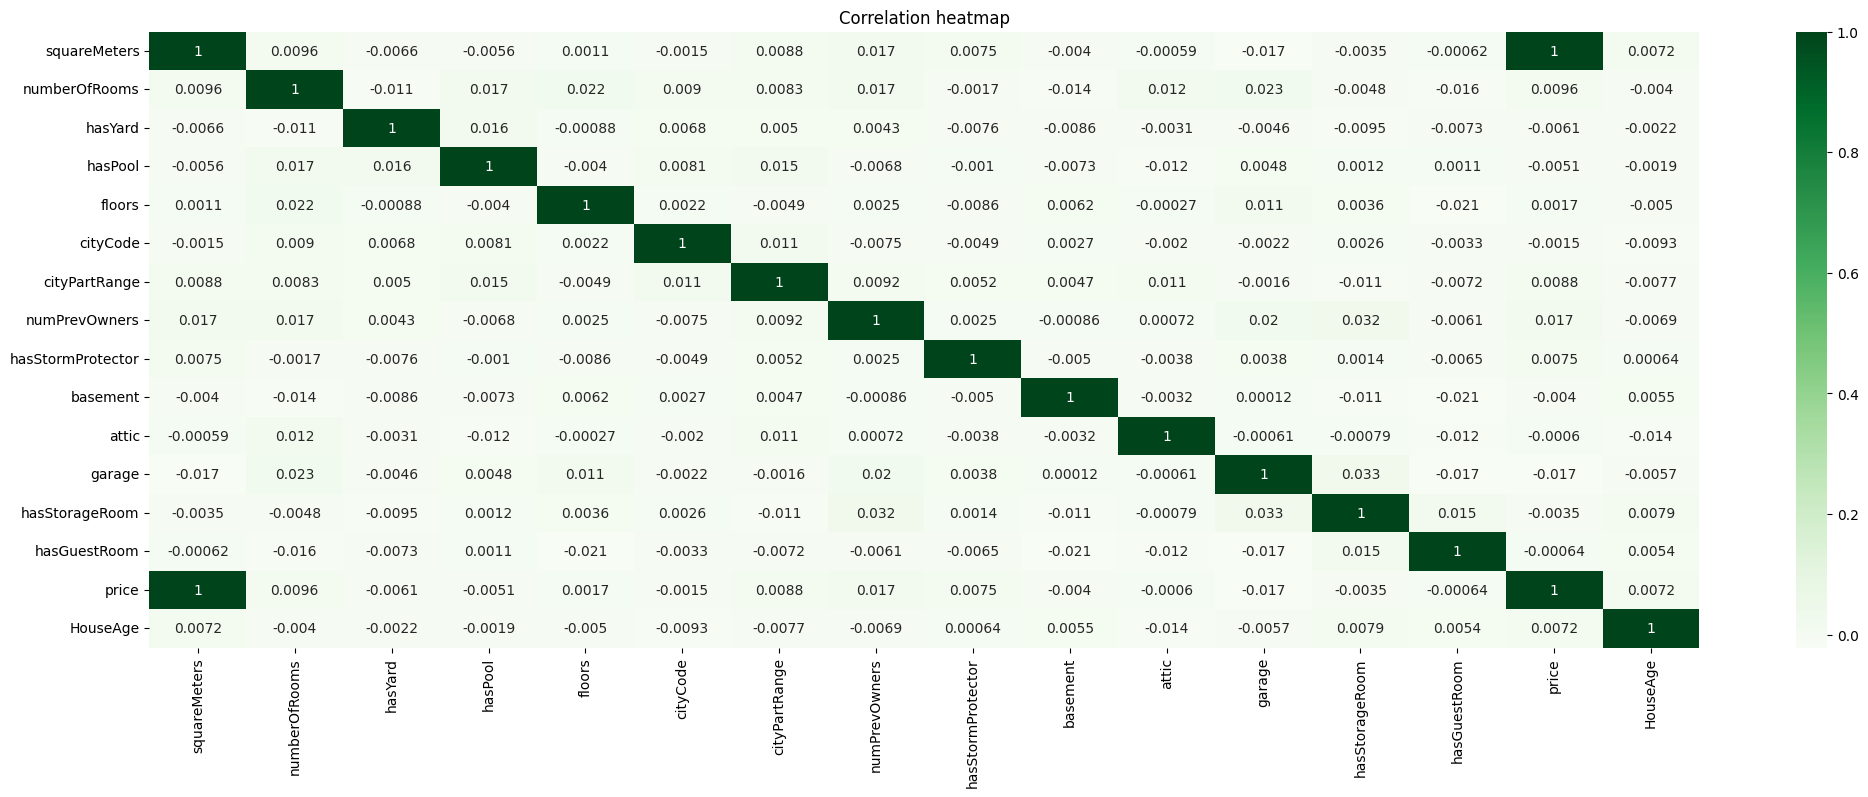

In [27]:
plt.figure(figsize=(25,8))
sns.heatmap(c,annot=True,cmap='Greens')
plt.title('Correlation heatmap')
plt.show()

# Feature Selection

In [28]:
x=df[['squareMeters','numberOfRooms','hasYard','hasPool','floors','cityCode','cityPartRange','numPrevOwners','hasStormProtector','basement','attic','garage','hasStorageRoom','hasGuestRoom','HouseAge']]
y=df['price']

# Data Splitting

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)

In [30]:
x_train

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,HouseAge
5951,52264,50,1,1,89,83169,3,6,1,491,4498,981,1,10,19
6630,8746,3,1,0,39,84452,6,1,1,3641,7340,494,0,3,17
3240,24995,59,1,1,95,84138,7,10,1,6515,5027,837,0,3,16
5942,74477,22,1,1,27,61997,9,8,0,8045,9970,109,0,6,31
3789,33369,70,0,0,1,51828,1,6,1,5485,9071,475,1,9,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3714,44219,15,1,1,82,46095,1,5,0,9721,4242,388,1,1,34
7409,52339,21,1,0,40,62344,7,1,0,7476,879,243,0,10,5
3325,98149,91,0,1,24,50437,8,10,1,4751,7622,549,1,5,17
9606,90957,88,0,1,79,62257,1,10,1,4806,9299,920,0,6,22


In [31]:
y_train

5951    5230980.6
6630     880925.8
3240    2511825.9
5942    7454179.4
3789    3337636.7
          ...    
3714    4436813.1
7409    5240271.0
3325    9820073.8
9606    9099516.3
5787    8295028.3
Name: price, Length: 8000, dtype: float64

# Data Scaling

In [32]:
# x_train and x_test scaled with StandardScaler

In [33]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Initial Modeling & Hypothesis Testing:

In [34]:
# List of linear regression models to apply
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Neural Network": MLPRegressor(max_iter=1000)
}

In [35]:
# Function to evaluate model performance
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

In [36]:
# Dictionary to store the results
results = {}

In [37]:
for name, model in models.items(): # When you call items() on a dictionary, returns a list of the dictionary’s key-value tuple pairs.
                                   # Here "name" represents the "key", and "model" represents the "value"
  if name in ["Support Vector Regressor", "Neural Network"]: # Standardised value is only applied to support vector regressor and Neural network
        # Apply scaling for models that need it
        model.fit(x_train_scaled, y_train)
        y_pred = model.predict(x_test_scaled)
  else:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

        # Compute evaluation metrics
  mae, rmse, r2 = evaluate_model(y_test, y_pred)
  results[name] = {"MAE": mae, "RMSE": rmse, "R²": r2}

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [38]:
# Convert results to a DataFrame for better visualization
results_df= pd.DataFrame(results).T
print(results_df)

                                   MAE          RMSE        R²
Linear Regression         1.449408e+03  1.856982e+03  1.000000
Ridge Regression          1.449398e+03  1.856974e+03  1.000000
Lasso Regression          1.449447e+03  1.857004e+03  1.000000
ElasticNet Regression     1.896570e+03  2.337611e+03  0.999999
Decision Tree             4.415138e+03  5.559097e+03  0.999996
Random Forest             3.157007e+03  3.902119e+03  0.999998
Gradient Boosting         1.531758e+04  2.023624e+04  0.999952
Support Vector Regressor  2.540265e+06  2.924412e+06 -0.004100
K-Nearest Neighbors       6.020475e+04  7.569679e+04  0.999327
Neural Network            4.847620e+06  5.605471e+06 -2.689132


**The best performing model is: Linear Regression**

# Model Generation

In [39]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [40]:
y_pred=model.predict(x_test)
accuracy=r2_score(y_test,y_pred)
print(accuracy)

0.9999995951299316


In [41]:
import pickle
with open('paris_real_estate_model.pickle','wb') as f:
    pickle.dump(model,f)

# Prediction

Method 1

In [42]:
# Define and assign values to the variables for the new house
new_square_meters = 75523
new_number_of_rooms = 4
new_has_yard = 1
new_has_pool = 0
new_floors = 2
new_city_code = 9373
new_city_part_range = 3
new_num_prev_owners = 1
new_has_storm_protector = 1
new_basement = 0
new_attic = 1
new_garage = 1
new_has_storage_room = 1
new_has_guest_room = 0
new_HouseAge = 4

In [43]:
# Create a DataFrame for the new house features
new_house_features = pd.DataFrame({
    'squareMeters': [new_square_meters],
    'numberOfRooms': [new_number_of_rooms],
    'hasYard': [new_has_yard],
    'hasPool': [new_has_pool],
    'floors': [new_floors],
    'cityCode': [new_city_code],
    'cityPartRange': [new_city_part_range],
    'numPrevOwners': [new_num_prev_owners],
    'hasStormProtector': [new_has_storm_protector],
    'basement': [new_basement],
    'attic': [new_attic],
    'garage': [new_garage],
    'hasStorageRoom': [new_has_storage_room],
    'hasGuestRoom': [new_has_guest_room],
    'HouseAge': [new_HouseAge]

})

In [44]:
predicted_price =model.predict(new_house_features)
print(f"The Predicted Price: € {predicted_price[0]:.2f}")

The Predicted Price: € 7556101.16


Methode 2

In [45]:
x_test

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,HouseAge
5669,87683,53,0,1,57,30308,3,3,0,1759,1003,850,1,7,32
8800,14074,85,1,1,78,18483,10,9,0,6987,475,143,1,3,22
3205,42616,83,0,1,97,11070,6,4,0,7206,2319,489,1,1,29
8731,55752,48,1,0,42,32183,5,7,1,829,5952,830,1,4,6
6412,69418,3,1,1,70,32221,3,6,1,1835,543,314,0,6,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,41083,69,1,0,62,90286,9,6,0,4279,1984,683,0,10,8
142,16068,21,1,0,13,21716,8,8,1,8893,2564,463,0,2,34
275,24393,46,1,1,16,18507,4,8,0,4080,4764,619,1,2,6
8265,93180,91,1,1,3,10016,1,2,0,2120,5643,653,1,1,13


In [46]:
y_test

5669    8774909.3
8800    1421626.3
3205    4272292.6
8731    5580831.9
6412    6951279.2
          ...    
794     4114499.7
142     1611707.1
275     2449464.9
8265    9323693.2
7950    9637443.6
Name: price, Length: 2000, dtype: float64

In [47]:
input_data=(87683,  53  ,0  ,1, 57, 30308   ,3, 3   ,0, 1759,   1003,   850,    1,  7   ,31)

input_data_as_numpy_array=np.asarray(input_data)

input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

# std_data= scaler.transform(input_data_reshaped)

prediction=model.predict(input_data_reshaped)

print(f"The Predicted Price: € {prediction}")

The Predicted Price: € [8774980.47897245]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
